### Projet NoteBook

1. Choisir un thème (medecine, sport, musique, …)
2. Trouver un dataset au format csv dans kaggle sur le thème choisi
3. Trouver une colonne à prédire
4. Indiquer une colonne qui pourrait d’après vos connaissances sur le dataset choisi être un bon prédicteur pour la colonne à prédire
5. Plotter un catplot de ces 2 colonnes (ou tout autre visu qui pourrait confirmer ou infirmer le choix précédent)
6. Utiliser le TP intro stats pour trouver le meilleur predicteur (ici une fonction lineaire y = ax + b), selon la methode des moindres carrés
7. Evaluer la qualité du predicteur en calculant son RMSE (Root Mean Squared Error)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# DataSet : Turbine_Data

## 1. Analyse du DataSet

In [2]:
#Chargement des données dans un dataframe
data = pd.read_csv('Data/Turbine_Data.csv')
df = data.copy()

In [3]:
df.shape

(118224, 22)

In [96]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
70789,2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,0.0,58.852307,56.782879,...,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,G01,44.80,2.212693
70791,2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,0.0,48.911180,56.033333,...,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,G01,49.00,2.130019
70793,2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,0.0,56.859428,55.873937,...,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,G01,61.50,2.347810
70794,2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,0.0,56.761226,55.807661,...,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,G01,93.25,2.161460
70795,2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,0.0,56.483241,55.451512,...,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,G01,138.50,1.913490


In [4]:
df.isna().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

Après une analyse rapide, on constate que sur les 118 000 valeurs, nous avons pour certaines colonnes (BladePitchAngle notamment) plus de la moitié des valeurs manquantes. Pour l'Active Power et WindSpeed, nous avons un peu plus de 10% des valeurs manquantes. Considérant que nous avons suffisamment de valeurs pour un simple modèle de régression linéaire, nous supprimerons chaque ligne contenant des valeurs manquantes.

In [5]:
df.dropna(inplace=True)
df.shape

(32728, 22)

## 2. Analyse des données

### Observation de la génération d'électricité en fonction du temps

Afin de rendre plus lisible le graphique, un resample par mois est effectué sur un nouveau dataset 'df_date'. On constate sur le graphe ci-dessus que la génération d'électricité est plus importante entre le mois de juin et d'octobre. En superposant la vitesse du vent, on se rend compte que ces périodes correspondent également au moment où le vent souffle le plus fort.

In [99]:
df_date = data.copy()

df_date.rename(columns={"Unnamed: 0": "DateTime"},inplace=True)
format = '%Y-%m-%d %H:%M:%S'
df_date['DateTime'] = pd.to_datetime(df_date['DateTime'], format = format)
df_date['ActivePower'].dropna(inplace=True)

#Reéchantillonage des dates en moyennant les valeurs sur le mois
df_date = df_date.resample('m', on='DateTime').mean().dropna(how='all')

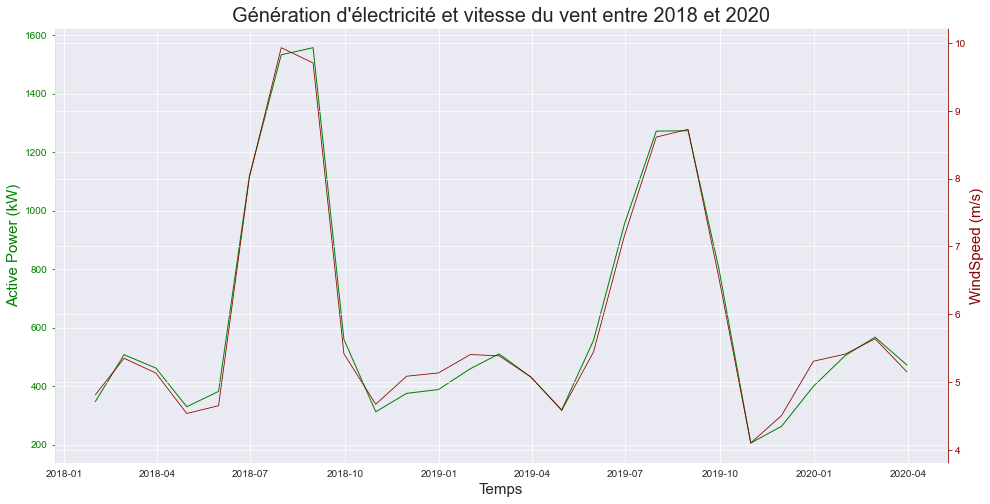

In [100]:
g1, ax = plt.subplots(figsize=(16, 8))

#Création d'un graphique pour visualiser ActivePower en fonction du temps
g1 = sns.lineplot(x=df_date.index, y="ActivePower", data=df_date, ax=ax, color='green', linewidth =1)
ax.yaxis.label.set_color('green')
ax.set_xlabel('Temps', fontsize=15)
ax.set_ylabel('Active Power (kW)', fontsize=15)
ax.spines["left"].set_edgecolor('green')
ax.tick_params(axis='y', colors ='green')

#Creation d'un deuxième axe avec la vitesse du vent
ax2 = ax.twinx()
sns.lineplot(x=df_date.index, y="WindSpeed", data=df_date, color='darkred',ax=ax2,linewidth=0.8)
ax2.yaxis.label.set_color('darkred')
ax2.set_ylabel("WindSpeed (m/s)", fontsize=15)
ax2.spines["right"].set_edgecolor('darkred')
ax2.tick_params(axis='y', colors ='darkred')

plt.title("Génération d'électricité et vitesse du vent entre 2018 et 2020", fontsize=20)

plt.show()

### Observation :

La matrice de corrélation, permet d'observer les corrélations potentielles entre les différentes colonnes de notre dataset. 
On se rend compte rapidement que plusieurs paramètres dépendent les uns des autres comme notamment RotorRPM, ReactivePower, Gearbox Oil Temp ou encore WindSpeed/Generator Winding.Il faut donc faire attention aux variables dépendantes.

Sans grande surprise, la génération d'électricité (Active Power) est étroitement liée à la vitesse du vent (WindSpeed), le coefficient de corrélation est égal à 0.93.

Dans une moindre mesure, on peut observer une légère corrélation (0.37) entre Active Power et WindDirection, et une corrél. négative entre l'angle (BladePitchAngle) des pales de l'éolienne et ActivePower.

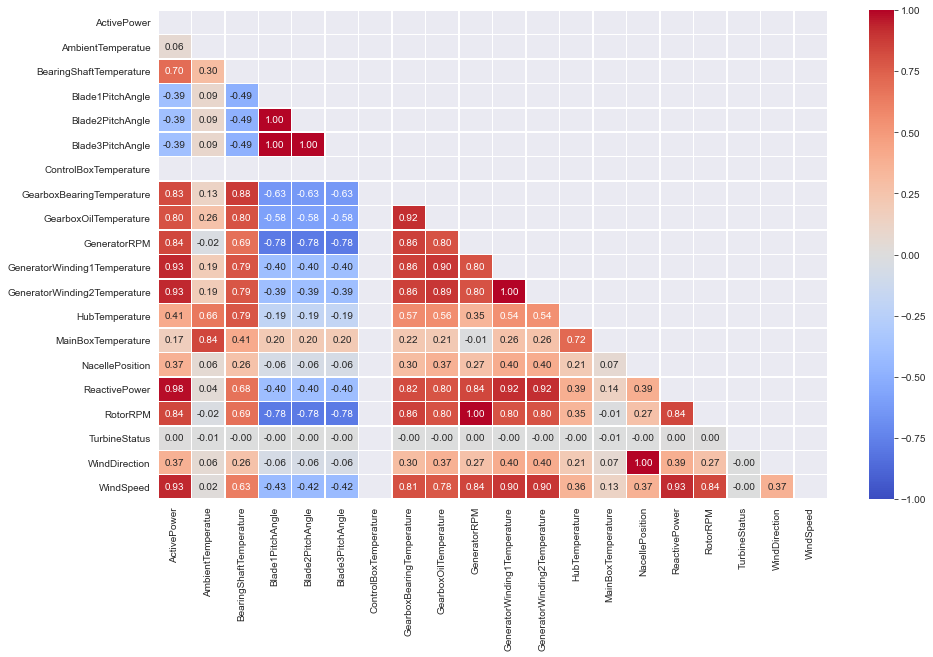

In [8]:
#Création d'une matrix pour cacher la partie supérieure de la matrice
matrix = np.triu(df.corr())

sns.set_style("darkgrid")
fig, bx = plt.subplots(figsize=(15,9))  
sns.heatmap(df.corr(), 
           vmin=-1, vmax=1, center= 0,
           cmap= 'coolwarm',
            annot=True,
           linewidths=0.5,
            mask=matrix,
            ax=bx,
            fmt='.2f'
           );

### Observation

Grâce à ce pairplot entre la direction du vent et la génération d'électricité, on constate qu’un nombre important des valeurs d'ActivePower sont égales à 0.

D'un autre côté, si l'on regarde la relation entre la vitesse du vent la génération d'électricité, on constate que malgré une augmentation de la vitesse du vent, l'éolienne ne peut pas générer plus de 1750kW, correspondant probablement à sa capacité maximale.

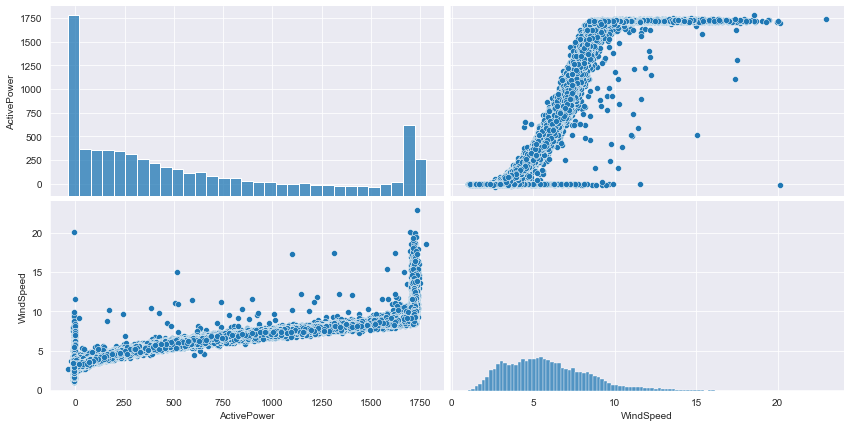

In [9]:
sns.pairplot(data=df[["ActivePower","WindSpeed"]], height=3, aspect=2);

Le plot ci-dessous nous permet de mieux comprendre les valuers d'ActivePower égales à 0. L'éolienne n'a pas généré d'électricité car les pales étaient inclinées à plus de 80°. L'orientation des pales pouvant être commandée à distance, cela est probablement volontaire. Pour la suite des analyses, nous déciderons du supprimer ces valeurs.

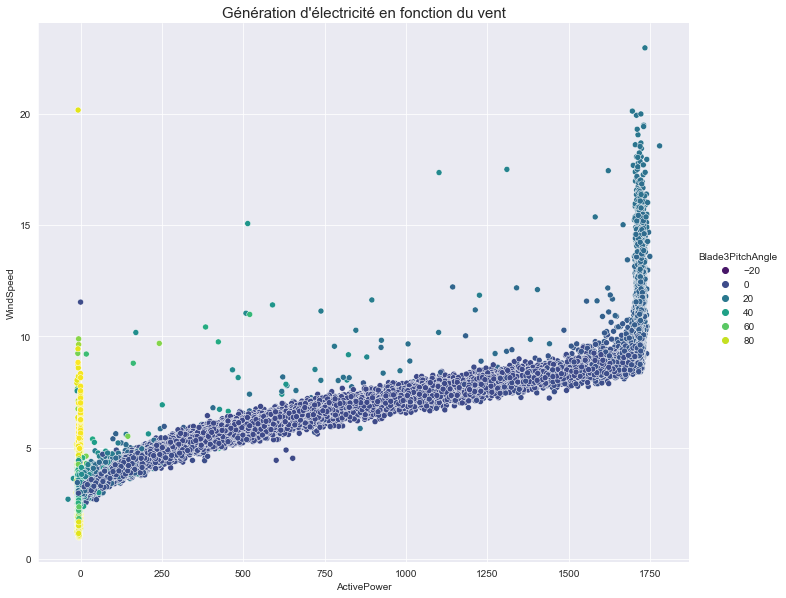

In [79]:
sns.relplot(x ="ActivePower", y ="WindSpeed", hue ='Blade3PitchAngle', 
            palette='viridis', data = df, height=8, aspect=1.2)
plt.title("Génération d'électricité en fonction du vent",fontsize = 15);

En supprimant les valeurs d'ActivePower inférieures à 100 kW et celles supérieures à 1700 kW, nous obtenons le graphique ci-dessus montrant une belle corrélation entre notre deux variables.

In [11]:
#Création d'un nouveau dataframe avec les valeurs filtrées
df_filt = df.copy()
df_filt['ActivePower'] = df_filt['ActivePower'][df_filt['ActivePower']<1700][df_filt['ActivePower']>100]
df_filt.dropna(inplace=True)

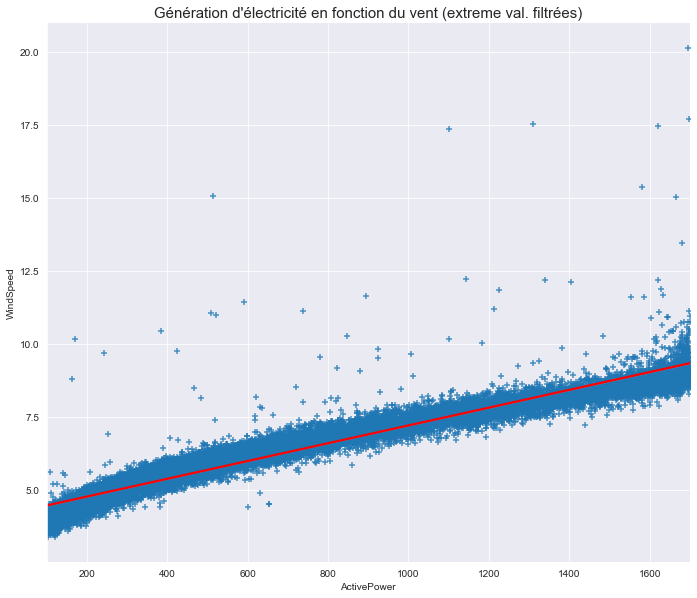

In [92]:
#Graphique avec les données filtrées
sns.lmplot(x ="ActivePower", y ="WindSpeed", data = df_filt, height=8, aspect=1.2, markers = '+', palette='#95a5a6',
          line_kws={'color': 'red'});
plt.title("Génération d'électricité en fonction du vent (extreme val. filtrées)",fontsize = 15);

## 3.Régression linéaire simple

Le but principal de ce notebook était d'utiliser une simple régression linéaire afin de prédire une colonne. Précédemment, nous avons pu mettre en évidence la relation entre la vitesse du vent (WindSpeed) et la génération d'électricté (ActivePower).

Dans cette partie, nous allons calculer les meilleurs coefficients 'a' et 'b' qui permettront de minimiser l'erreur dans nos futures prédictions.

In [101]:
from math import *

x =list(df_filt["WindSpeed"])
y =list(df_filt["ActivePower"])

#Fonction pour calculer les coefficients a et b dans le cas d'une régression linéaire
def coeff(data1,data2):
    
    x_y = sum_x = sum_y = x_x = 0
    
    #Prépation des variables pour calculer les coefficients 'a' et 'b'
    for i in range(len(x)):
        x_y = (x[i] * y[i]) + x_y
        sum_x = x[i]+sum_x
        sum_y= y[i]+sum_y
        x_x = (x[i]*x[i]) + x_x

    a = (len(x)*x_y - sum_x*sum_y) / (len(x)*x_x - sum_x*sum_x)
    b = (sum_y * x_x - sum_x * x_y) / ( len(x)*x_x  - sum_x*sum_x)
    return a,b

#Fonction pour calculer la RMSE
def rmse(data1,data2):
    a,b = coeff(data1,data2)
    RMSEtemp = 0
    #Calcul de la RMSE
    for i in range(len(x)):
        y_pred = a * x[i] + b
        RMSEtemp = ((y_pred - y[i])**2/ len(x)) + RMSEtemp
    
    return sqrt(RMSEtemp) 



Ci-dessous les coefficients minimisant la RMSE avec une simple régression linéaire.

In [14]:
print("a = {}, b = {}".format(coeff(x,y)[0],coeff(x,y)[1]))

print("L'écart quadratique moyen est égale à :", rmse(x,y))


a = 302.63169406274807, b = -1205.3760751559
L'écart quadratique moyen est égale à : 130.5490642141659


---


Création d'un Widget permettant de prédire ActivePower en fonction de la vitesse du vent(à visualiser avec la bibliothèque Voila)

In [15]:
import ipywidgets as widgets

slider = widgets.FloatSlider(description='Wind Speed (m/s)', value=6, max = 16)
text = widgets.FloatText(disabled=True, description='Active Power (kw)')

def compute(*ignore):
    text.value = round(302.63169406274807*slider.value + -1205.3760751559)
    if text.value > 1750:
        text.value=1750
    elif text.value<0:
        text.value = 0
   

slider.observe(compute, 'value')

widgets.VBox([slider, text])

## 4. Essayons d'améliorer les prédictions avec des algorithmes plus complexe

Le but initial de ce notebook était de créer une droite de régression linéaire qui nous permettrait de prédire l'ActivePower en fonction de la vitesse du vent. Nous avons vu qu’une simple régression linéaire générait une erreur assez significative (environ 130). Dans un but purement d'apprentissage et de curiosité, les quelques lignes de code nous permettront de voir ce que des algos plus complexes pourrait donner comme résultat.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [95]:
#Target
y= df_filt['ActivePower']

#Features
X = df_filt[['WindSpeed','WindDirection','Blade1PitchAngle']]

# Split validation/training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

linear = LinearRegression()
rf = RandomForestRegressor(random_state=1)
arbre = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)


models= [linear, arbre, rf]

#Boucle sur chaque modèle
for model in models:
    model.fit(train_X, train_y)
    y_pred= model.predict(val_X)
    accuracy= model.score(val_X, val_y) 
    rmse = mean_squared_error(y_pred, val_y, squared=False)
    print(f"La précision du modèle {type(model).__name__} est {accuracy:.2f}, RMSE = {rmse:.1f}.")
    print("\n")

La précision du modèle LinearRegression est 0.91, RMSE = 141.1.


La précision du modèle DecisionTreeRegressor est 0.98, RMSE = 72.2.


La précision du modèle RandomForestRegressor est 0.98, RMSE = 69.2.




In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Test des différents modèles sur des valeurs sélectionnées au hasard dans le dataset

In [64]:
from random import sample 

#Récupération d'un échantillon au hasard et assignations des features (val_X), pred (val_y)
val  = df_filt.sample()[['ActivePower','WindSpeed','WindDirection','Blade1PitchAngle']]
val_X = (val[['WindSpeed','WindDirection','Blade1PitchAngle']])
val_y = list(val['ActivePower'])

#Affichage des résultats pour chaque modèle
print("ActivePower à deviner : {:,.0f}".format(val_y[0]))
print('---------------------------------------')
print("Régression linéaire, ActivePower_pred = {:,.0f}".format(linear_regression.predict(val_X)[0]))
print("Abre de décison, ActivePower_pred = {:,.0f}".format(arbre_model.predict(val_X)[0]))
print("Forêt d'arbres décisionnels, ActivePower_pred = {:,.0f} \n".format(rf_model.predict(val_X)[0]))

#Ecart entre la valeur prédite(val_y) et celle connue (y_pred à partir de val_X[0])
linear_diff = abs(val_y[0] - linear_regression.predict(val_X)[0])
arbre_diff = abs(val_y[0] - arbre_model.predict(val_X)[0])
rf_diff = abs(val_y[0] - rf_model.predict(val_X)[0])

#Identification du meilleur modèle pour cet échantillon
if (linear_diff < arbre_diff) and (linear_diff < rf_diff):
    print("\033[1mLe modèle de régression linéaire est le plus proche de la vérité ! \n ActivePower_val = {:,.0f} \n ActivePower_pred = {:,.0f}"
          .format(val_y[0],linear_regression.predict(val_X)[0]))
elif (rf_diff < arbre_diff) and (rf_diff < linear_diff):
    print("\033[1mLe modèle de forêt d'arbres décisionnels est le plus proche de la vérité ! \n ActivePower_val = {:,.0f} \n ActivePower_pred = {:,.0f}"
          .format(val_y[0],rf_model.predict(val_X)[0]))
elif (arbre_diff < rf_diff) and (arbre_diff < linear_diff):
     print("\033[1mLe modèle d'arbre de décision est le plus proche de la vérité ! \n ActivePower_val = {:,.0f} \n ActivePower_pred = {:,.0f}"
           .format(val_y[0],arbre_model.predict(val_X)[0]))
else:
    print("\033[1mDeux modèles ou plus donnent le même résultat...")
    


ActivePower à deviner : 825
---------------------------------------
Régression linéaire, ActivePower_pred = 844
Abre de décison, ActivePower_pred = 742
Forêt d'arbres décisionnels, ActivePower_pred = 772 

Le modèle de régression linéaire est le plus proche de la vérité ! 
 ActivePower_val = 825 
 ActivePower_pred = 844


-----------
Voyons voir sur un test de X échantillons, quel algorithme donne les meilleurs résultats !

In [22]:
#Fonction prennant en argument le nombre de test à réaliser sur les trois algos. présentés précédemment
def testAlgo(nb_test):
    rf=linear=arbre=0
    for i in range(nb_test):
        #Récupération d'un échantillon au hasard et assignations des features (val_X), pred (val_y)
        val  = df_filt.sample()[['ActivePower','WindSpeed','WindDirection','Blade1PitchAngle']]
        val_X = val[['WindSpeed','WindDirection','Blade1PitchAngle']]
        val_y = list(val['ActivePower'])
        
        #Moyen pour vérifier quel algo a le mieux performé !
        linear_diff = abs(val_y[0] - linear_regression.predict(val_X)[0])
        arbre_diff = abs(val_y[0] - arbre_model.predict(val_X)[0])
        rf_diff = abs(val_y[0] - rf_model.predict(val_X)[0])
        if (linear_diff < arbre_diff) and (linear_diff < rf_diff):
            linear = linear+1
        elif (rf_diff < arbre_diff) and (rf_diff < linear_diff):
            rf = rf+1
        elif (arbre_diff < rf_diff) and (arbre_diff < linear_diff):
            arbre = arbre + 1

    #Passage des résultats en %            
    rf = rf/nb_test *100
    linear = linear/nb_test *100
    arbre = arbre/nb_test *100
        
    print("Sur {} test : \n - la forêt d'abres décisionnels est la plus proche dans : {}% \n - l'arbre de décision : {}% \n - la régression linéaire : {}% "
          .format(nb_test, rf,arbre,linear))

testAlgo(200)
    

Sur 200 test : 
 - la forêt d'abres décisionnels est la plus proche dans : 70.0% 
 - l'arbre de décision : 19.0% 
 - la régression linéaire : 11.0% 


#### Malgré la faible différence de RMSE entre l'arbre de décision et la forêt (respectivement 72 et 69), La forêt d'arbres décisionnels est l'algo le plus performant dans environ 70% des cas !